In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [3]:
udiddata = pd.read_csv(r"UDIDDATA_change.csv")
udiddata.head()

,state_name,district_name,disability_type,age_lower,age_upper,Male_count,female_count,total
0,Maharashtra,Yavatmal,Acid Attack Victim,35,60,1,0,1
1,Maharashtra,Yavatmal,Acid Attack Victim,60,80,0,1,1
2,Haryana,Yamunanagar,Acid Attack Victim,15,35,1,0,1
3,Haryana,Yamunanagar,Acid Attack Victim,35,60,4,0,4
4,Karnataka,Yadgir,Acid Attack Victim,15,35,5,8,13


In [4]:
udiddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52946 entries, 0 to 52945
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state_name       52946 non-null  object
 1   district_name    52946 non-null  object
 2   disability_type  52946 non-null  object
 3   age_lower        52946 non-null  int64 
 4   age_upper        52946 non-null  int64 
 5   Male_count       52946 non-null  int64 
 6   female_count     52946 non-null  int64 
 7   total            52946 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.2+ MB


In [5]:
udiddata['disability_type'].value_counts()

Locomotor Disability               4173
Hearing Impairment                 4024
Blindness                          3856
Low Vision                         3681
Intellectual Disability            3575
Multiple Disability                3422
Mental Illness                     3400
Cerebral Palsy                     3135
Muscular Dystrophy                 2638
Speech And Language Disability     2539
Chronic Neurological Conditions    2291
Autism Spectrum Disorder           2131
Hemophilia                         2074
Short Stature/Dwarfism             1969
Leprosy Cured                      1922
Thalassemia                        1778
Multiple Sclerosis                 1524
Parkinson'S Disease                1279
Specific Learning Disabilities     1261
Sickle Cell Disease                1160
Acid Attack Victim                 1114
Name: disability_type, dtype: int64

In [6]:
age = (udiddata['age_lower'] + udiddata['age_upper'])/ 2
print(age)

0        47.5
1        70.0
2        25.0
3        47.5
4        25.0
         ... 
52941    10.5
52942    25.0
52943     3.0
52944    10.5
52945    25.0
Length: 52946, dtype: float64


In [6]:
df = pd.read_csv("UDIDDATA_change.csv")

In [10]:
target_variable = "disability_type"
class_labels = df[target_variable].unique()

class_labels_df = pd.DataFrame(class_labels, columns=["disability_type"])

print(class_labels_df)
print('*******************************************************************************************')

#Average of age
age_average = (df['age_lower']+df['age_upper'])/2
print(age_average)
print('*******************************************************************************************')


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#Training,testing datas
X = age_average
y = df['disability_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#model using multinomial naive bayes
nb_model = MultinomialNB()
nb_model.fit(X_train.values.reshape(-1,1), y_train)

prob_predict = nb_model.predict_proba(X_test.values.reshape(-1,1))
print(prob_predict[0])

                    disability_type
0                Acid Attack Victim
1          Autism Spectrum Disorder
2                         Blindness
3                    Cerebral Palsy
4   Chronic Neurological Conditions
5                Hearing Impairment
6                        Hemophilia
7           Intellectual Disability
8                     Leprosy Cured
9              Locomotor Disability
10                       Low Vision
11                   Mental Illness
12              Multiple Disability
13               Multiple Sclerosis
14               Muscular Dystrophy
15              Parkinson'S Disease
16           Short Stature/Dwarfism
17              Sickle Cell Disease
18   Specific Learning Disabilities
19   Speech And Language Disability
20                      Thalassemia
*******************************************************************************************
0        47.5
1        70.0
2        25.0
3        47.5
4        25.0
         ... 
52941    10.5
52942    25.0
5294

In [10]:
np.sum(prob_predict[0])

0.9999999999999998

In [17]:
nb_model.score(X_train.values.reshape(-1,1), y_train)

0.07935351573039771

In [19]:
cn = confusion_matrix(y_test, prob_predict)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [45]:
np.c_[y_test, prob_predict]
print(class_labels)



['Acid Attack Victim' 'Autism Spectrum Disorder' 'Blindness'
 'Cerebral Palsy' 'Chronic Neurological Conditions' 'Hearing Impairment'
 'Hemophilia' 'Intellectual Disability' 'Leprosy Cured'
 'Locomotor Disability' 'Low Vision' 'Mental Illness'
 'Multiple Disability' 'Multiple Sclerosis' 'Muscular Dystrophy'
 "Parkinson'S Disease" 'Short Stature/Dwarfism' 'Sickle Cell Disease'
 'Specific Learning Disabilities' 'Speech And Language Disability'
 'Thalassemia']


In [49]:
x = np.array(age)
x

array([47.5, 70. , 25. , ...,  3. , 10.5, 25. ])

In [55]:
from sklearn.preprocessing import LabelEncoder

disablity_encoder = LabelEncoder()

y_encoded = disablity_encoder.fit_transform(df[target_variable])
y_encoded

array([ 0,  0,  0, ..., 20, 20, 20])

In [88]:
max_col = (np.argmax(prob_predict, axis=1))
max_col

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

In [89]:
prob_predict.shape

(15884, 21)

In [141]:
np.mean(max_col)

9.0

In [153]:
all_same = all(np.array(prob_predict[0].all()) == np.array(x).all for x in prob_predict)
print(all_same)

False


In [120]:
nb_model.predict(X_train[10].reshape(-1,1))

array(['Locomotor Disability'], dtype='<U31')

In [123]:
y_train[10]

'Acid Attack Victim'

<AxesSubplot:>

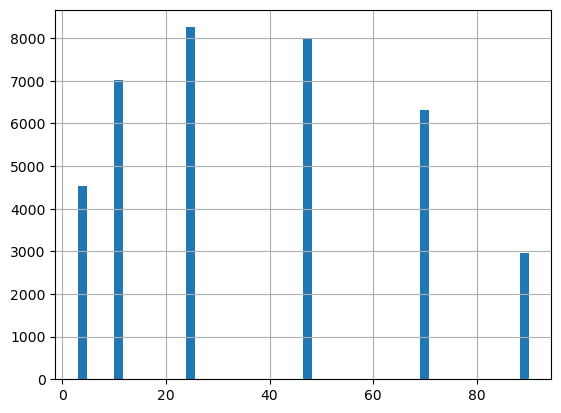

In [164]:
X_train.hist(bins=50)


In [165]:
count = 0 
for i in prob_predict:
    if prob_predict[0].all() == i.all():
        count += 1
print(count, prob_predict.shape)

15884 (15884, 21)


NameError: name 'X_train' is not defined

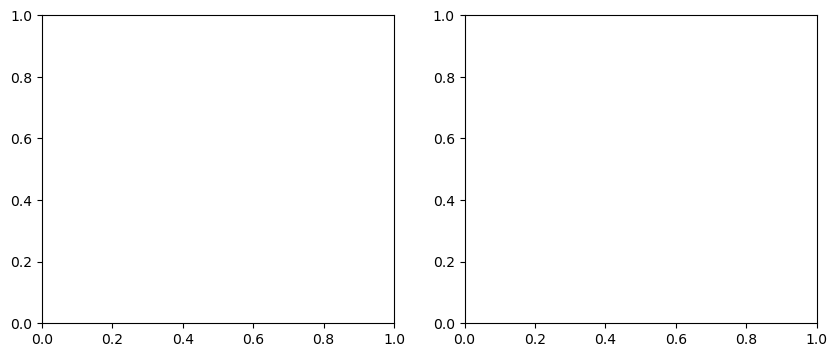

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Create histograms for each dataset in the respective subplots
ax1.hist(X_train, bins=20, alpha=0.5, color='blue', label='age')
ax2.hist(X_test, bins=20, alpha=0.5, color='red', label='age')

# Add labels and legends to each subplot
ax1.set_title('Training Set')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.legend()
ax2.set_title('Test Set')accuracy

ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.legend()

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


In [2]:
print('hello')

hello


In [3]:
from sklearn.metrics import accuracy_score as score


In [5]:
ypred=model.predict(X_test)
print(score(y_test,ypred))

NameError: name 'model' is not defined

In [19]:
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error 
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []
scores = []
# X_train = X_train.values.reshape(-1,1)
# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    
    # Scale the training set
#     scaler_poly = StandardScaler()
#     X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
#     scalers.append(scaler_poly)
    
    # Create and train the model
#     model = LinearRegression()
#     model.fit(X_train_mapped_scaled, y_train )
    model = MultinomialNB()
    model.fit(X_train, y_train)
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train)
    scores.append(model.score(X_train, y_train))
#     train_mse = mean_squared_error(y_train, yhat) / 2
#     train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
#     poly = PolynomialFeatures(degree, include_bias=False)
#     X_cv_mapped = poly.fit_transform(x_cv)
#     X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
#     yhat = model.predict(X_cv_mapped_scaled)
#     cv_mse = mean_squared_error(y_cv, yhat) / 2
#     cv_mses.append(cv_mse)
    
# Plot the results
# degrees=range(1,11)
# utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [33]:
models[9].predict(X_train[459].reshape(-1,1))

array(['Locomotor Disability'], dtype='<U31')

In [49]:
print(df['state_name'].value_counts())
print("Number of states",df['state_name'].nunique())

Uttar Pradesh                           6647
Madhya Pradesh                          4480
Bihar                                   3426
Tamil Nadu                              3301
Maharashtra                             3136
Karnataka                               2835
Odisha                                  2811
Rajasthan                               2667
Assam                                   2287
Gujarat                                 2241
Chhattisgarh                            2116
Punjab                                  2069
Jharkhand                               2048
Jammu And Kashmir                       1698
Haryana                                 1679
Kerala                                  1222
Uttarakhand                             1022
Himachal Pradesh                         879
Telangana                                819
Delhi                                    759
Andhra Pradesh                           674
Manipur                                  673
Meghalaya 

In [51]:
print(df['district_name'].value_counts())
print("Number of district",df['district_name'].nunique())

Hamirpur          180
Pratapgarh        179
Balrampur         171
Aurangabad        164
Bilaspur          159
                 ... 
Dinajpur Uttar      1
Nandyal             1
Noklak              1
Maldah              1
Kra Daadi           1
Name: district_name, Length: 734, dtype: int64
Number of district 734


In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

state_encoded = label_encoder.fit_transform(df['state_name'])


In [57]:
np.unique(state_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [64]:
label_encoder.inverse_transform([30])

array(['Tamil Nadu'], dtype=object)

In [78]:
import numpy as np

array1 = age_average
array2 = state_encoded

merged_array = np.column_stack((array1, array2))



In [86]:
x_trains, x_tests, y_trains, y_tests = train_test_split(merged_array, y, test_size=0.3 ,stratify=merged_array[:,], random_state=42)

In [92]:
new_model = MultinomialNB()
new_model.fit(x_trains, y_trains)


MultinomialNB()

In [93]:
y_tests

19974            Intellectual Disability
11331    Chronic Neurological Conditions
5846                           Blindness
43908                Parkinson'S Disease
6731                           Blindness
                      ...               
8220                      Cerebral Palsy
20810            Intellectual Disability
30420                         Low Vision
4127                           Blindness
1879            Autism Spectrum Disorder
Name: disability_type, Length: 15884, dtype: object

In [103]:
model.predict(x_trains[2000].reshape(-1,1))

array(['Locomotor Disability', 'Locomotor Disability'], dtype='<U31')